# Comparison of supervised learning models

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

In [11]:
# Comparing all three supervised models

# Load all three result files
with open('lr_results.pkl', 'rb') as f:
    lr_results = pickle.load(f)

with open('svm_results.pkl', 'rb') as f:
    svm_results = pickle.load(f)

with open('rf_results.pkl', 'rb') as f:
    rf_results = pickle.load(f)

In [12]:
# Test set comparison 

# Create comparison dataframe from test metrics
test_comparison = pd.DataFrame({
    'Model': [lr_results['model_name'], svm_results['model_name'], rf_results['model_name']],
    'Accuracy': [lr_results['test_metrics']['accuracy'], 
                 svm_results['test_metrics']['accuracy'], 
                 rf_results['test_metrics']['accuracy']],
    'Precision': [lr_results['test_metrics']['precision'], 
                  svm_results['test_metrics']['precision'], 
                  rf_results['test_metrics']['precision']],
    'Recall': [lr_results['test_metrics']['recall'], 
               svm_results['test_metrics']['recall'], 
               rf_results['test_metrics']['recall']],
    'F1-Score': [lr_results['test_metrics']['f1'], 
                 svm_results['test_metrics']['f1'], 
                 rf_results['test_metrics']['f1']],
    'ROC-AUC': [lr_results['test_metrics']['roc_auc'], 
                svm_results['test_metrics']['roc_auc'], 
                rf_results['test_metrics']['roc_auc']]
})

print(test_comparison.to_string(index=False))
print()

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.661557   0.245161 0.589147  0.346241 0.698300
                SVM  0.643868   0.238671 0.612403  0.343478 0.699917
      Random Forest  0.846698   0.333333 0.007752  0.015152 0.685448



In [13]:
# Create comparison dataframe

cv_comparison = []

for model_name, results in [('Logistic Regression', lr_results), 
                             ('SVM', svm_results), 
                             ('Random Forest', rf_results)]:
    
    accuracy_mean, accuracy_std = results['cv_metrics']['accuracy']
    precision_mean, precision_std = results['cv_metrics']['precision']
    recall_mean, recall_std = results['cv_metrics']['recall']
    f1_mean, f1_std = results['cv_metrics']['f1']
    roc_auc_mean, roc_auc_std = results['cv_metrics']['roc_auc']
    
    cv_comparison.append({
        'Model': model_name,
        'Accuracy': f"{accuracy_mean:.4f} ± {accuracy_std:.4f}",
        'Precision': f"{precision_mean:.4f} ± {precision_std:.4f}",
        'Recall': f"{recall_mean:.4f} ± {recall_std:.4f}",
        'F1-Score': f"{f1_mean:.4f} ± {f1_std:.4f}",
        'ROC-AUC': f"{roc_auc_mean:.4f} ± {roc_auc_std:.4f}"
    })

cv_comparison_df = pd.DataFrame(cv_comparison)
print(cv_comparison_df.to_string(index=False))
print()

              Model        Accuracy       Precision          Recall        F1-Score         ROC-AUC
Logistic Regression 0.6735 ± 0.0163 0.2727 ± 0.0149 0.6874 ± 0.0284 0.3903 ± 0.0190 0.7331 ± 0.0261
                SVM 0.6608 ± 0.0184 0.2676 ± 0.0142 0.7068 ± 0.0198 0.3880 ± 0.0169 0.7326 ± 0.0247
      Random Forest 0.8490 ± 0.0018 0.5800 ± 0.3816 0.0136 ± 0.0078 0.0265 ± 0.0151 0.7232 ± 0.0248



In [14]:
# Identify best model for each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for metric in metrics:
    best_idx = test_comparison[metric].idxmax()
    best_model = test_comparison.loc[best_idx, 'Model']
    best_score = test_comparison.loc[best_idx, metric]
    
    print(f"{metric:12} -> {best_model:25} ({best_score:.4f})")

print()

Accuracy     -> Random Forest             (0.8467)
Precision    -> Random Forest             (0.3333)
Recall       -> SVM                       (0.6124)
F1-Score     -> Logistic Regression       (0.3462)
ROC-AUC      -> SVM                       (0.6999)



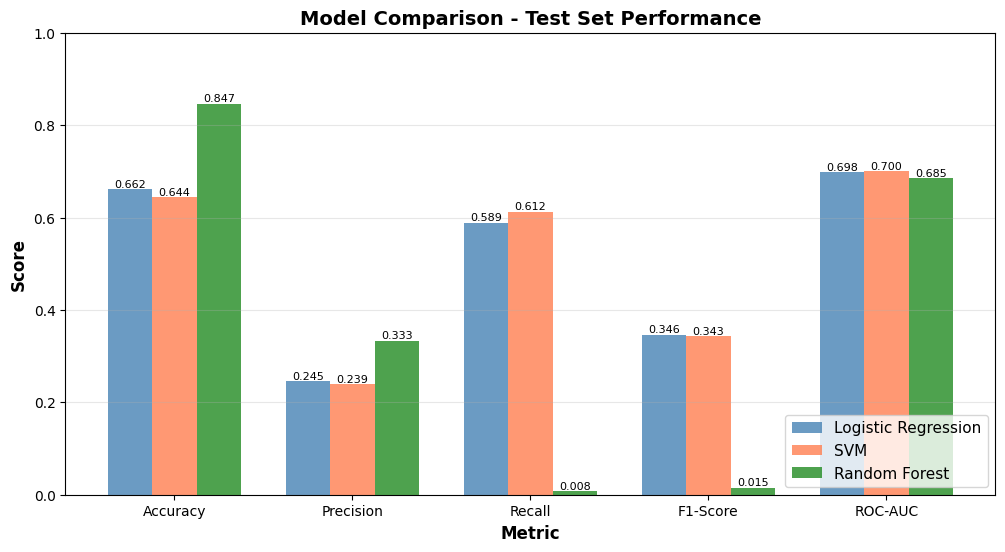

In [15]:
# Visualize test set comparison

fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25

lr_scores = test_comparison[test_comparison['Model'] == 'Logistic Regression'][metrics].values[0]
svm_scores = test_comparison[test_comparison['Model'] == 'SVM'][metrics].values[0]
rf_scores = test_comparison[test_comparison['Model'] == 'Random Forest'][metrics].values[0]

bars1 = ax.bar(x - width, lr_scores, width, label='Logistic Regression', color='steelblue', alpha=0.8)
bars2 = ax.bar(x, svm_scores, width, label='SVM', color='coral', alpha=0.8)
bars3 = ax.bar(x + width, rf_scores, width, label='Random Forest', color='forestgreen', alpha=0.8)

ax.set_xlabel('Metric', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison - Test Set Performance', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

#plt.tight_layout()
plt.show()


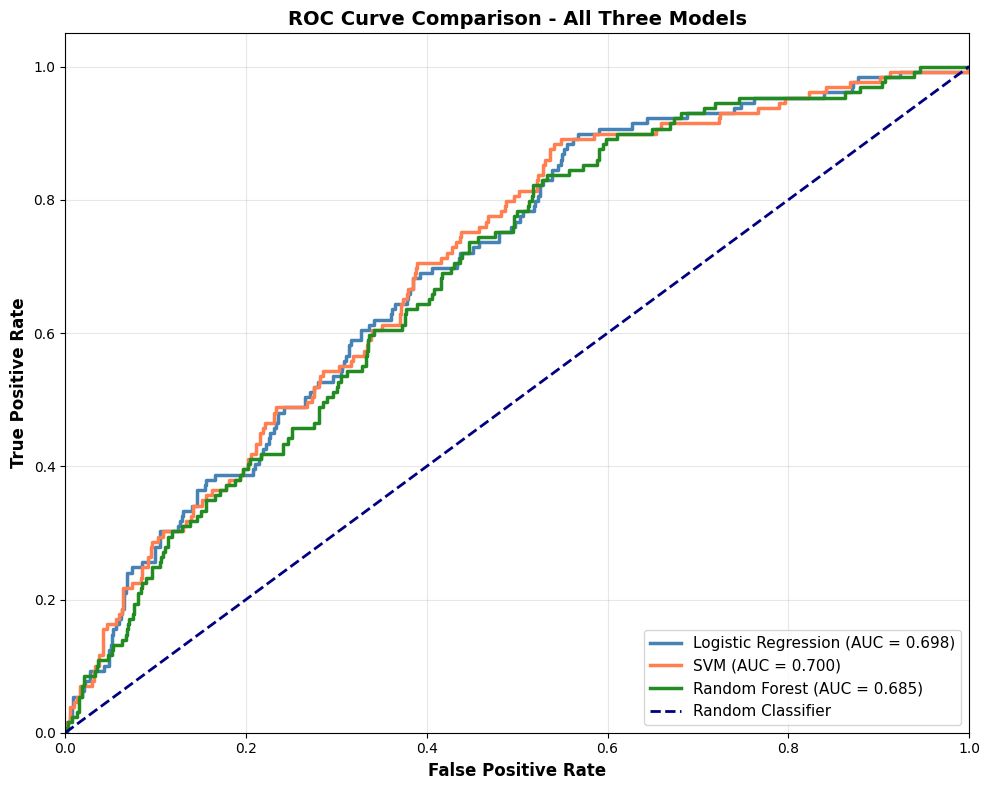

In [16]:
# Visualize ROC curves overlay

# Load the trained models to get predictions
import pickle
from sklearn.metrics import roc_curve, auc

with open('lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

with open('svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)

# Load test data
test_data = pd.read_csv('framingham_test_processed.csv')
X_test = test_data.drop('TenYearCHD', axis=1)
y_test = test_data['TenYearCHD']

# Get predictions for each model
lr_proba = lr_model.predict_proba(X_test)[:, 1]
svm_proba = svm_model.predict_proba(X_test)[:, 1]
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)
lr_auc = auc(lr_fpr, lr_tpr)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba)
svm_auc = auc(svm_fpr, svm_tpr)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot all three ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(lr_fpr, lr_tpr, color='steelblue', lw=2.5, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
ax.plot(svm_fpr, svm_tpr, color='coral', lw=2.5, label=f'SVM (AUC = {svm_auc:.3f})')
ax.plot(rf_fpr, rf_tpr, color='forestgreen', lw=2.5, label=f'Random Forest (AUC = {rf_auc:.3f})')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve Comparison - All Three Models', fontsize=14, fontweight='bold')
ax.legend(loc="lower right", fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("ROC-AUC Scores:")
print(f"  Logistic Regression: {lr_auc:.4f}")
print(f"  SVM:                 {svm_auc:.4f}")
print(f"  Random Forest:       {rf_auc:.4f}")


ROC-AUC Scores:
  Logistic Regression: 0.6983
  SVM:                 0.6999
  Random Forest:       0.6854

